In [7]:
import yfinance as yf
import pandas as pd
import finance_calculator as fc
import numpy as np
import pyfolio as pf
import empyrical as em
import datapackage as dp
import requests
import bs4 as bs

In [8]:
# 
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

In [9]:
tickers = []
date_first_added = []
for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        #fourth element is the sector
        
        
        tickers.append(ticker)
     

In [10]:
#We can get rid of the n at the of the ticker by using map, lambda and strip:
tickers = list(map(lambda s: s.strip(), tickers))

In [11]:
date_first_added = []

for row in table.findAll('tr')[1:]:
        date = row.findAll('td')[6].text
        
        date_first_added.append(date)


In [12]:
ticker_df = pd.DataFrame(tickers, columns=['ticker'])
date_first_added_df = pd.DataFrame(date_first_added, columns=['date first added'])

ticker_date_df = pd.concat([ticker_df, date_first_added_df], axis=1,)

ticker_date_df.head()

,ticker,date first added
0,MMM,1976-08-09
1,ABT,1964-03-31
2,ABBV,2012-12-31
3,ABMD,2018-05-31
4,ACN,2011-07-06


In [13]:
#isolate comapanies with data dating back to at least Jan 1st 2018 using loc and conditional statement
random_stock_pool = ticker_date_df.loc[ticker_date_df['date first added'] < '2018-01-01']
random_stock_pool.reset_index(inplace=True)
random_stock_pool

,index,ticker,date first added
0,0,MMM,1976-08-09
1,1,ABT,1964-03-31
2,2,ABBV,2012-12-31
3,4,ACN,2011-07-06
4,5,ATVI,2015-08-31
...,...,...,...
430,499,XYL,2011-11-01
431,500,YUM,1997-10-06
432,502,ZBH,2001-08-07
433,503,ZION,2001-06-22


In [14]:
random_stock_pool_tickers = random_stock_pool['ticker']
random_stock_pool_tickers.count()

435

In [15]:
# Market Index Informations and pull their historical closing price since January 2018
start = "2018-01-01"
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(start= start, actions=False)
sp500_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)

In [16]:
#generate 10 random integers from 0 - 499 to serve as our randomly created portfolio
high = random_stock_pool_tickers.count()
index_numbers = np.random.randint(low=0, high=high, size=10)
print(index_numbers)

[191 322 279  64 156 262  25 107 144 342]


In [17]:
#isloate ticker symbols using loc function
random_portfolio_tickers = random_stock_pool_tickers.loc[index_numbers].reset_index()
random_portfolio_tickers

,index,ticker
0,191,GS
1,322,PSX
2,279,MHK
3,64,BK
4,156,ES
5,262,MAR
6,25,AAL
7,107,CMCSA
8,144,ECL
9,342,RJF


In [18]:

# pull data for 10 randomly genereated stocks 
random_stock_0 = yf.Ticker(random_portfolio_tickers["ticker"][0])
random_stock_1 = yf.Ticker(random_portfolio_tickers["ticker"][1])
random_stock_2 = yf.Ticker(random_portfolio_tickers["ticker"][2])
random_stock_3 = yf.Ticker(random_portfolio_tickers["ticker"][3])
random_stock_4 = yf.Ticker(random_portfolio_tickers["ticker"][4])
random_stock_5 = yf.Ticker(random_portfolio_tickers["ticker"][5])
random_stock_6 = yf.Ticker(random_portfolio_tickers["ticker"][6])
random_stock_7 = yf.Ticker(random_portfolio_tickers["ticker"][7])
random_stock_8 = yf.Ticker(random_portfolio_tickers["ticker"][8])
random_stock_9 = yf.Ticker(random_portfolio_tickers["ticker"][9])

random_stock_0_data = random_stock_0.history(start = start, actions =False)
random_stock_1_data = random_stock_1.history(start = start, actions =False)
random_stock_2_data = random_stock_2.history(start = start, actions =False)
random_stock_3_data = random_stock_3.history(start = start, actions =False)
random_stock_4_data = random_stock_4.history(start = start, actions =False)
random_stock_5_data = random_stock_5.history(start = start, actions =False)
random_stock_6_data = random_stock_6.history(start = start, actions =False)
random_stock_7_data = random_stock_7.history(start = start, actions =False)
random_stock_8_data = random_stock_8.history(start = start, actions =False)
random_stock_9_data = random_stock_9.history(start = start, actions =False)

random_stock_0_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_1_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_2_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_3_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_4_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_5_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_6_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_7_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_8_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_9_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)

#Combine into single df
random_portfolio = pd.concat([random_stock_0_data, 
           random_stock_1_data, 
           random_stock_2_data, 
           random_stock_3_data, 
           random_stock_4_data, 
           random_stock_5_data, 
           random_stock_6_data, 
           random_stock_7_data, 
           random_stock_8_data, 
           random_stock_9_data], 
           axis="columns", join="inner").reset_index()

random_portfolio.set_index('Date', inplace=True)


In [19]:
daily_returns = random_portfolio.pct_change()
daily_returns

,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.009309,0.006683,-0.003116,0.006132,-0.008868,0.020187,-0.012267,-0.016070,0.006468,0.010578
2018-01-04,0.013976,-0.002734,0.000436,0.009972,-0.014060,-0.005496,0.006305,0.006434,0.008126,0.008241
2018-01-05,-0.005101,0.000098,0.005122,0.002560,0.001783,-0.009580,-0.000380,0.009097,0.005203,0.004528
2018-01-08,-0.014519,-0.000979,0.008964,0.004195,0.006956,0.014434,-0.009877,-0.013645,-0.003499,0.008136
...,...,...,...,...,...,...,...,...,...,...
2021-09-27,0.022924,0.045414,0.014589,0.035888,-0.014153,0.011868,0.003740,0.000889,-0.024534,0.014389
2021-09-28,-0.025787,-0.003093,-0.014005,-0.009176,-0.005276,-0.004731,-0.001863,-0.027358,-0.025014,-0.013761
2021-09-29,-0.011836,-0.013397,-0.008186,-0.005292,0.013198,-0.010938,-0.019599,0.021553,-0.000564,0.004401


In [20]:
# calculate daily returns of portfolio assuming equal with (0.1) into each stock
weights = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]

random_portfolio_returns = daily_returns.dot(weights)
random_portfolio_returns.head()

Date
2018-01-02         NaN
2018-01-03    0.000042
2018-01-04    0.003120
2018-01-05    0.001333
2018-01-08    0.000017
dtype: float64

In [21]:
# calucluate daily returnsd of S&P 500 then join with random portfolio returns

sp_daily_returns = sp500_data.pct_change()

sp_vs_random_returns = pd.concat([random_portfolio_returns, sp_daily_returns], axis="columns", join="inner")
sp_vs_random_return_columns = ["Random Portfolio","S&P 500"]
sp_vs_random_returns.columns=(sp_vs_random_return_columns)

<AxesSubplot:xlabel='Date'>

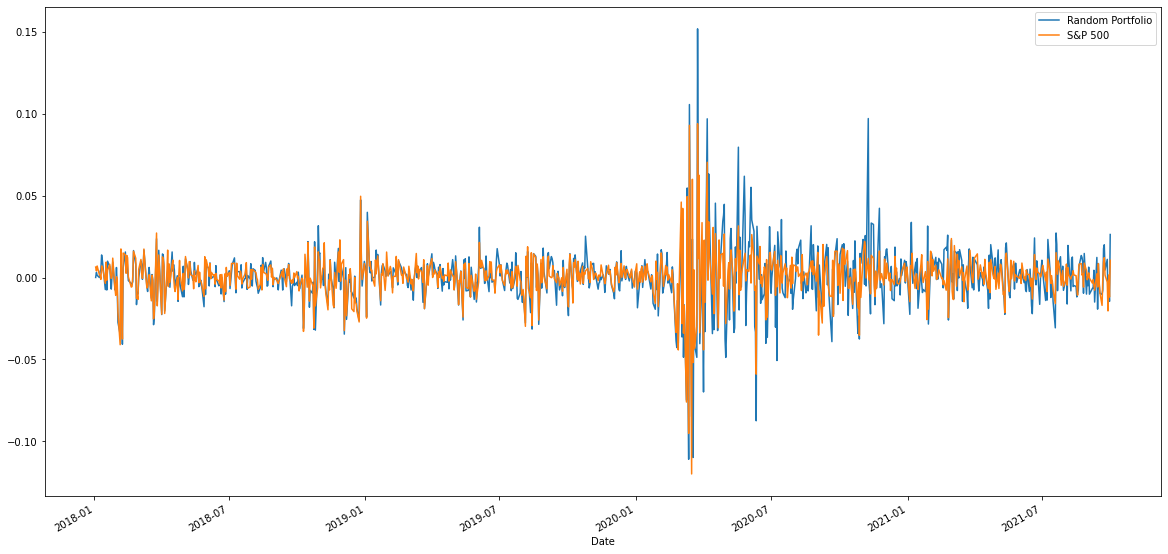

In [22]:
sp_vs_random_returns.plot(figsize = (20, 10))

In [23]:
growth_of_10k = 10000 * ((1+ sp_vs_random_returns).cumprod())

<AxesSubplot:xlabel='Date'>

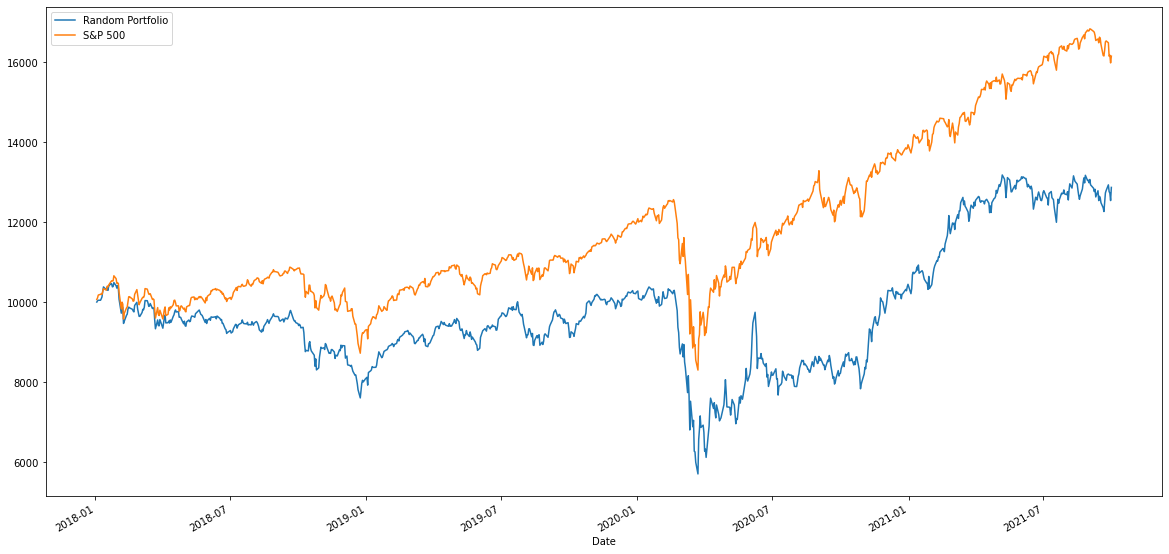

In [24]:
growth_of_10k.plot(figsize=(20,10))

In [27]:
growth_of_10k_reset_index = growth_of_10k.reset_index()

current_value_random = growth_of_10k_reset_index["S&P 500"]
current_value_sp_500

KeyError: -1